In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
data.head()


,Text,Label
0,"""The new policy is a disaster, designed to ben...",Propaganda
1,"""According to recent statistics released by th...",Non-Propaganda
2,"""Our leaders are corrupt and only serve their ...",Propaganda
3,"""A study published in the Journal of Economics...",Non-Propaganda
4,"""The opposition is trying to destroy the fabri...",Propaganda


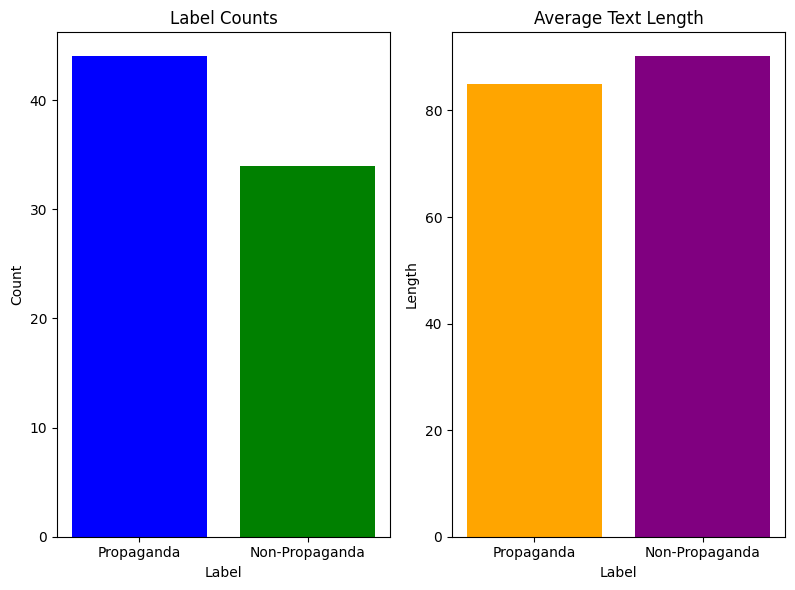

([('the', 45),
  ('to', 24),
  ('of', 20),
  ('"The', 13),
  ('are', 12),
  ('is', 11),
  ('and', 11),
  ('in', 10),
  ('a', 9),
  ('by', 9)],
 [('to', 15),
  ('the', 15),
  ('in', 13),
  ('and', 10),
  ('of', 7),
  ('"A', 6),
  ('a', 6),
  ('for', 6),
  ('"The', 5),
  ('economic', 5)])

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

# Basic statistics
label_counts = data['Label'].value_counts()

# Text length analysis
data['Text_Length'] = data['Text'].apply(len)
average_length = data.groupby('Label')['Text_Length'].mean()

# Word frequency analysis
def word_frequency(texts):
    words = []
    for text in texts:
        words.extend(text.split())
    return Counter(words)

word_freq_propaganda = word_frequency(data[data['Label'] == 'Propaganda']['Text'])
word_freq_non_propaganda = word_frequency(data[data['Label'] == 'Non-Propaganda']['Text'])

# Top 10 words in each category
top_words_propaganda = word_freq_propaganda.most_common(10)
top_words_non_propaganda = word_freq_non_propaganda.most_common(10)

# Preparing data for plots
labels = list(label_counts.index)
counts = list(label_counts.values)
avg_lengths = list(average_length)

# Creating plots
plt.figure(figsize=(12, 6))

# Plot for label counts
plt.subplot(1, 3, 1)
plt.bar(labels, counts, color=['blue', 'green'])
plt.title('Label Counts')
plt.ylabel('Count')
plt.xlabel('Label')

# Plot for average text length
plt.subplot(1, 3, 2)
plt.bar(labels, avg_lengths, color=['orange', 'purple'])
plt.title('Average Text Length')
plt.ylabel('Length')
plt.xlabel('Label')

# Show plots
plt.tight_layout()
plt.show()

(top_words_propaganda, top_words_non_propaganda)
